In [1]:
# ライブラリのimport

# NumPy用ライブラリ
import numpy as np
# Matplotlib中のpyplotライブラリのインポート
import matplotlib.pyplot as plt
# matplotlib日本語化対応ライブラリのインポート
import japanize_matplotlib
# pandas用ライブラリ
import pandas as pd
# データフレーム表示用関数
from IPython.display import display
# seaborn
import seaborn as sns
# 表示オプション調整
# NumPy表示形式の設定
np.set_printoptions(precision=3, floatmode='fixed')
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# サイズ設定
plt.rcParams['figure.figsize'] = (6, 6)
# 方眼表示ON
plt.rcParams['axes.grid'] = True
# データフレームでの表示精度
pd.options.display.float_format = '{:.3f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

Text(0.5, 1.0, 'くじ引き問題の確率分布の可視化結果')

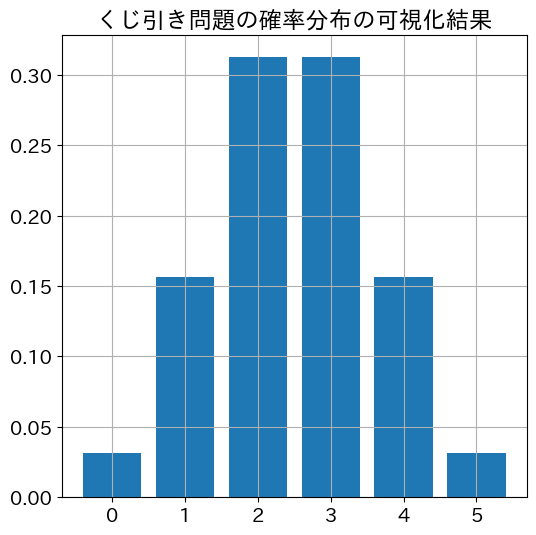

In [2]:
from scipy.special import comb  # comb(n, k) は二項係数 C(n, k) = nCk を計算する関数。

# くじ引きの「何通りあるか」という組合せの数を与える。

n = 5  # 試行回数 n を 5 回とする設定。
# ここでは「くじを 5 回引く」など、成功/失敗の 2 値事象が 5 回起こる状況を想定している。

x = range(n + 1)  # 取りうる成功回数 x = 0, 1, 2, 3, 4, 5 を表す。
# 離散確率変数 X ~ Binomial(n=5, p=1/2) の「値の候補」に対応する。

y = [comb(n, i) / 2**n for i in x]
# comb(n, i) は「n 回の試行のうち i 回成功する並び方の数」= 組合せの数 C(n, i) を表す。
# くじ引き問題で「当たり or ハズレ」が等確率 (p = 1/2) で起こると仮定すると、
# 各試行列（当たり/ハズレの並び）の起こりやすさは (1/2)^n で一定になる。
# よって「i 回成功する確率」は
#   P(X = i) = C(n, i) * (1/2)^i * (1/2)^(n-i) = C(n, i) / 2^n
# となる。これは p = 1/2 の二項分布 Binomial(n=5, p=1/2) の確率質量関数に他ならない。
# ここではその確率 P(X = i) を y に格納している。

plt.bar(x, y)
# x 軸に成功回数 i（0〜5）、y 軸にその確率 P(X = i) をとった棒グラフを描画している。
# これは「5 回くじを引いたときに当たりが何回出るか」の確率分布（二項分布）の形を
# 視覚的に理解するための可視化である。

plt.title("くじ引き問題の確率分布の可視化結果")
# グラフタイトルを設定することで、「くじ引き問題」に対応する確率分布であることを明示している。

Text(0.5, 1.0, 'くじ引き問題の確率分布の可視化結果(n=1000)')

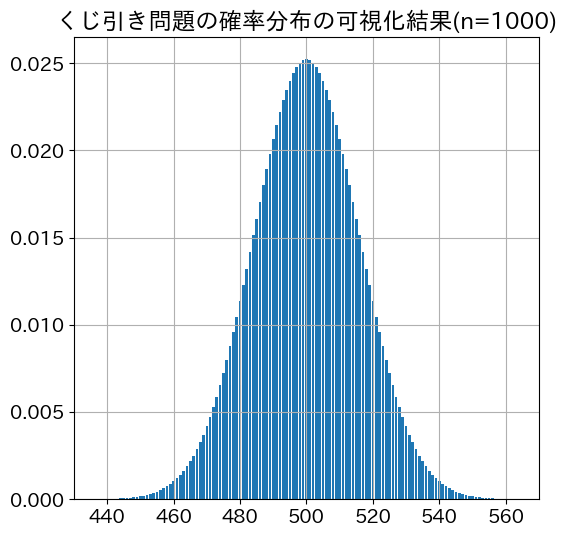

In [3]:
from scipy.special import comb  # comb(n, k) は二項係数 C(n, k) = nCk を計算する関数。

# ここでは「1000 回の試行のうち i 回成功する並び方の数」を表す。

n = 1000  # 試行回数 n を 1000 回に設定。
# 例えば「当たり / ハズレが等確率で起こるくじを 1000 回引く」といった状況を想定している。

x = range(n + 1)  # 成功回数 X が取りうる値の集合 {0, 1, ..., 1000} を生成。
# 離散確率変数 X ~ Binomial(n=1000, p=1/2) の「値の候補」に対応する。

y = [comb(n, i) / 2**n for i in x]
# comb(n, i) は「n 回の試行のうち i 回成功する並び方の数」= 二項係数 C(n, i) を表す。
# くじ引きが各回で独立かつ当たり/ハズレが等確率 p = 1/2 で起こると仮定すると、
# 各「並び方」（具体的な当たり・ハズレの列）は (1/2)^n の確率で起こる。
# よって「ちょうど i 回成功する」確率は
#   P(X = i) = C(n, i) * (1/2)^i * (1/2)^(n-i) = C(n, i) / 2^n
# となる。これは二項分布 Binomial(n=1000, p=1/2) の確率質量関数 (PMF) をそのまま実装した式になっている。
# n が 1000 と大きくなったことで、この二項分布は中心極限定理により
# 近似的に正規分布 N(μ = np, σ^2 = np(1-p)) ≒ N(500, 250) に近い形状を持つことが理論的に知られている。

plt.bar(x, y)
# x 軸に成功回数 i（0〜1000）、y 軸にその確率 P(X = i) をとった棒グラフを描画する。
# n が大きいため、本来の棒グラフは非常に細かい「ほぼ連続的な山」のような形になる。
# これは大数の法則や中心極限定理の結果として、
# 「多くの独立試行の和が正規分布に近づく」という現象を視覚的に確認できる例になっている。

plt.xlim((430, 570))
# x 軸の表示範囲を [430, 570] に制限している。
# 二項分布 Binomial(1000, 1/2) の平均は μ = np = 500、
# 分散は σ^2 = np(1-p) = 250、標準偏差は σ ≒ 15.81 なので、
# 430〜570 という範囲はおおよそ μ ± 4.4σ 程度の「中心付近」を拡大して見ていることに対応する。
# これにより、分布の「山」の形（正規分布に似たベル型）を詳細に観察することができる。

plt.title("くじ引き問題の確率分布の可視化結果(n=1000)")
# グラフタイトルとして「くじ引き問題の確率分布 (n=1000)」であることを明示している。
# 理論的には、これは 1000 回のベルヌーイ試行（当たり/ハズレ、p=1/2）に対する
# 二項分布 Binomial(1000, 1/2) の PMF をプロットしたものであり、
# n を大きくしたときに二項分布が正規分布に近似される、という中心極限定理の具体例としても解釈できる。

Text(0.5, 1.0, '確率分布と正規分布関数の重ね描き')

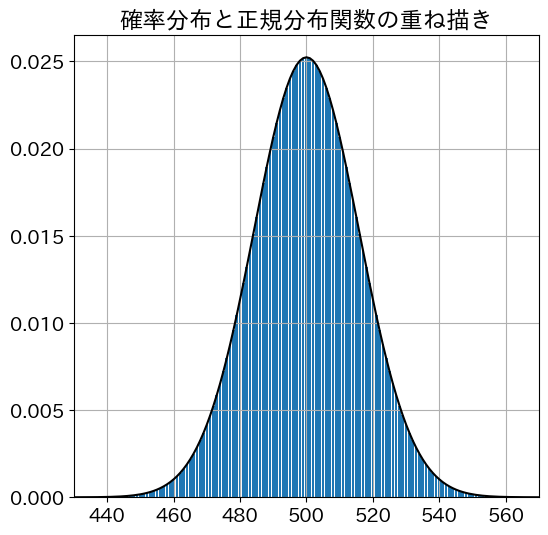

In [4]:
# 正規分布関数の定義
def norm(x, mu, sigma):
    """
    正規分布（ガウス分布）の確率密度関数を返す関数。
    ここでは連続型確率変数 X が
        X ~ N(μ, σ^2)
    に従うときの密度
        f(x) = 1 / (√(2π) σ) * exp( - (x - μ)^2 / (2σ^2) )
    を、そのまま実装している。

    引数:
        x    : 実数値または配列（確率密度を評価する点）
        mu   : 平均 μ
        sigma: 標準偏差 σ (> 0)

    戻り値:
        正規分布 N(μ, σ^2) の確率密度 f(x)
    """
    # ((x - mu)/sigma)**2 は (x - μ)^2 / σ^2 を表す。
    # それを -1/2 倍して exp を取ることで exp( -(x-μ)^2 / (2σ^2) ) を実装している。
    # 分母の np.sqrt(2 * np.pi) * sigma は 1/(√(2π)σ) の部分に対応する。
    return np.exp(-(((x - mu) / sigma) ** 2) / 2) / (np.sqrt(2 * np.pi) * sigma)


n = 1000  # 二項分布の試行回数 n。
# ここでは「当たり / ハズレが等確率 (p = 1/2) のくじを 1000 回引く」状況を想定している。
# X ~ Binomial(n=1000, p=1/2) を考える。

# グラフ描画の設定
plt.xlim((430, 570))
# x 軸の表示範囲を [430, 570] に制限している。
# 二項分布 Binomial(1000, 1/2) の平均は μ = np = 500、標準偏差は σ = √(np(1-p)) = √(250) ≈ 15.81。
# 430〜570 はおよそ μ ± 4.4σ 程度の範囲であり、確率質量のほとんどが集中する「中心部分」を拡大しているイメージになる。

x = np.arange(430, 571)
# 離散的な成功回数 X が取りうる値 430, 431, ..., 570 を配列として用意。
# 二項分布は離散分布なので、本来は 0〜1000 全部が支持だが、中心部分のみを描画対象としている。

# 確率分布（二項分布）のグラフ描画
y1 = [comb(n, i) / 2**n for i in x]
# comb(n, i) は二項係数 C(n, i) = nCi を計算する関数。
# 二項分布 Binomial(n, p) の確率質量関数 (PMF) は
#   P(X = i) = C(n, i) p^i (1-p)^{n-i}
# で与えられる。
# ここでは p = 1/2 と仮定しているので、
#   P(X = i) = C(n, i) (1/2)^i (1/2)^{n-i} = C(n, i) / 2^n
# となる。
# よって y1 は X ~ Binomial(1000, 1/2) に対する「ちょうど i 回成功する確率 P(X = i)」を格納している。

plt.bar(x, y1)
# x 軸に成功回数 i（430〜570）、y 軸にその確率 P(X = i) をとった棒グラフを描画する。
# これは二項分布 Binomial(1000, 1/2) の PMF の一部（中心付近）を可視化していることになる。
# n が大きいので、棒グラフは「滑らかな山」に近い形になり、正規分布に近似できることを視覚的に確認できる。

# 正規分布関数のグラフ描画
mu = n / 2
# 二項分布 Binomial(n, p) の平均は μ = np。
# ここでは p = 1/2 なので μ = n/2 = 500 となる。
# 正規近似では、この μ を正規分布の平均として用いる。

sigma = np.sqrt(mu / 2)
# 二項分布 Binomial(n, p) の分散は σ^2 = np(1-p)。
# p = 1/2 のとき
#   σ^2 = n * (1/2) * (1/2) = n/4
# なので、標準偏差は
#   σ = √(n/4)
# となる。
# ここでは mu = n/2 なので mu/2 = n/4 であり、
#   sigma = √(mu/2) = √(n/4)
# という形で同じ σ を計算している。
# この μ, σ を使って、二項分布を正規分布 N(μ, σ^2) で近似する（中心極限定理に基づく正規近似）。

y2 = norm(x, mu, sigma)
# 上で定義した norm 関数を用いて、正規分布 N(μ, σ^2) の確率密度 f(x) を計算している。
# ここで注意すべき点は、
#   - 二項分布は「確率質量関数」(PMF) で離散 （x は整数）
#   - 正規分布は「確率密度関数」(PDF) で連続
# という違いがあること。
# しかし、n が十分大きいとき、二項分布の棒グラフと正規分布の曲線は形状としてよく一致し、
#   X ~ Binomial(n, p) ≈ N(np, np(1-p))
# という中心極限定理の内容を視覚的に確認できる。

plt.plot(x, y2, c="k")
# 二項分布の棒グラフの上に、対応する正規分布 N(μ, σ^2) の確率密度曲線を黒線で重ね描きしている。
# この重ね描きによって、
#   - 二項分布の PMF（棒グラフ）
#   - 正規分布の PDF（滑らかな曲線）
# の形が非常によく似ていることを確認できる。
# これが「二項分布の正規近似」の具体例となり、
# 多数の独立試行の和が正規分布に近づく、という中心極限定理の理解に役立つ。

plt.title("確率分布と正規分布関数の重ね描き")
# タイトルとして「二項分布（確率分布）と正規分布（近似）の重ね描き」であることを明示している。
# 教材としては、ここに
#   - X ~ Binomial(1000, 1/2)
#   - X ≈ N(500, 250)
# といった注釈を加えると、理論との対応がさらに分かりやすくなる。

Text(0.5, 1.0, '正規分布関数と確率の関係')

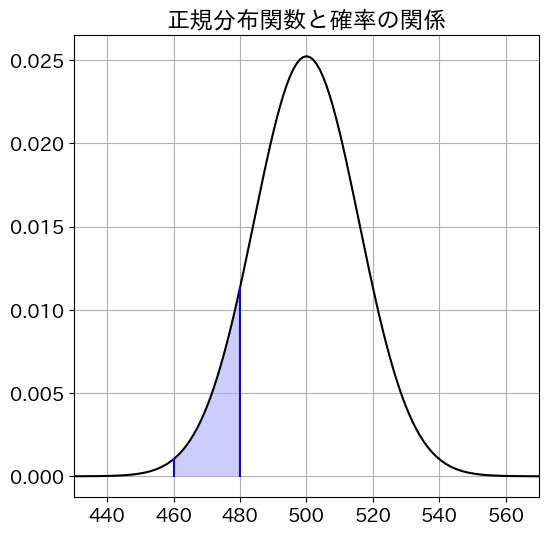

In [5]:
n = 1000
# 二項分布の試行回数 n。
# ここでは前と同様に、X ~ Binomial(n=1000, p=1/2) を正規分布で近似する状況を想定している。
# ただし、このコードは「正規分布そのものの確率的意味（面積 = 確率）」に焦点を当てている。

# グラフ描画
plt.xlim((430, 570))
# x 軸の表示範囲を [430, 570] に設定。
# 二項分布 Binomial(1000, 1/2) の平均 μ = 500、標準偏差 σ ≈ 15.81 であり、
# この範囲は μ ± 4.4σ 程度の「中心付近ほぼ全体」を切り出したイメージになっている。

x = np.arange(430, 571)
# 正規分布の確率密度関数を描画するための x 座標（430, 431, ..., 570）。
# 連続分布だが、数値計算ではこのように細かい離散点で近似的に描く。

x1 = 460
x2 = 480
# 正規分布の下で「確率を知りたい区間」の両端を指定。
# 本コードでは、連続確率変数 X が [460, 480] の範囲に入る確率
#   P(460 ≤ X ≤ 480)
# に対応する部分を塗りつぶして可視化する。

x_range = np.arange(x1, x2 + 1)
# 塗りつぶすべき区間 [x1, x2] 上の離散点（460, 461, ..., 480）。
# この範囲で正規分布の密度を評価し、その下側を塗りつぶすことで「面積 ≒ 確率」を表現する。

# 正規分布関数
mu = n / 2
# 二項分布 Binomial(n, p) の平均は μ = np。
# ここでは n = 1000, p = 1/2 なので μ = 500。
# 正規近似では、この μ を正規分布 N(μ, σ^2) の平均として用いる。

sigma = np.sqrt(mu / 2)
# 二項分布 Binomial(n, p) の分散は σ^2 = np(1-p)。
# p = 1/2 のとき
#   σ^2 = n * (1/2) * (1/2) = n/4
# なので、標準偏差は σ = √(n/4)。
# ここで mu = n/2 なので mu/2 = n/4 となり、
#   sigma = √(mu/2) = √(n/4)
# という形で同じ値を計算している。
# この (μ, σ) の組を使った正規分布は、X ~ Binomial(1000, 1/2) の正規近似に対応する。

plt.plot(x, norm(x, mu, sigma), c="k")
# 連続確率変数
#   Y ~ N(μ, σ^2)
# に対する確率密度関数 f_Y(x) を黒線で描画する。
# norm(x, mu, sigma) は
#   f_Y(x) = 1 / (√(2π) σ) * exp( - (x - μ)^2 / (2σ^2) )
# に相当する。
# この曲線自体は「密度」であり、縦軸の値は「単位長さあたりの確率質量」を意味する。

plt.fill_between(x_range, 0, norm(x_range, mu, sigma), facecolor="b", alpha=0.2)
# 区間 [x1, x2] = [460, 480] 上で、x 軸と正規分布の密度曲線の間を塗りつぶす処理。
# 理論的には、連続確率変数 Y ~ N(μ, σ^2) に対して
#   P(x1 ≤ Y ≤ x2) = ∫_{x1}^{x2} f_Y(x) dx
# であり、「密度曲線の下の面積」がそのまま確率になる。
# この fill_between は、その面積を視覚的に強調している。
# 数値的には積分を計算していないが、「この青い部分の面積が区間 [x1, x2] に入る確率」を表す、
# という確率論的な解釈を与えることができる。

plt.plot((x1, x1), (0, norm(x1, mu, sigma)), c="b")
plt.plot((x2, x2), (0, norm(x2, mu, sigma)), c="b")
# 区間の両端 x1, x2 に垂線を引くことで、「どこからどこまでの範囲を積分しているのか」を明示。
# 連続分布の確率
#   P(x1 ≤ Y ≤ x2)
# は「x1 と x2 の間の密度の積分」であり、グラフ上では
#   - 左の垂線 x = x1
#   - 右の垂線 x = x2
#   - 曲線 y = f_Y(x)
#   - x 軸
# に囲まれた部分の面積として理解できる。

plt.title("正規分布関数と確率の関係")
# タイトルとして「正規分布の確率密度関数と『確率 = 面積』の関係」を表していることを示している。
# この図は、連続型確率変数において「確率は区間上の面積として表される」という基本概念の可視化であり、
# ベイズ推論の文脈では「尤度や事後分布の下の面積がどのような意味を持つか」を直感的に理解する助けになる。

In [12]:
import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

Running on PyMC v5.25.1
Running on ArviZ v0.22.0


In [13]:
# 確率モデルコンテキスト用インスタンス生成
model = pm.Model()
# PyMC では「確率モデル」を pm.Model のインスタンスとして定義する。
# 理論的には、ベイズモデル全体
#   - 事前分布 p(θ)
#   - 尤度 p(D | θ)
#   - そこから導かれる事後分布 p(θ | D)
# を 1 つの「グラフィカルモデル」としてまとめて扱う器が pm.Model だと思ってよい。
# ここでは model が「これから定義する確率変数たち（パラメータや観測データ）が
# どのような確率関係にあるか」を記述するためのコンテナの役割を果たす。

# 先ほど定義したインスタンスを用いてwith文でコンテキストを指定
with model:
    # ここから with ブロック内で定義する確率変数は、すべて上で作った `model` に
    # 自動的に登録されていく。
    # 理論的には、「このブロック内で定義される分布・変数が同じベイズモデルの構成要素」
    # であることを宣言しているイメージになる。

    # Binomial: 二項分布の確率分布クラス
    #   X ~ Binomial(n, p)
    # という離散型確率変数を表す。
    # 確率質量関数 (PMF) は
    #   P(X = k) = C(n, k) p^k (1-p)^{n-k},  k = 0,1,...,n
    # で定義される。
    #
    # p: 二項分布における「1 回の試行が成功する確率」
    #   - ここでは p = 0.5 と固定されており、「成功と失敗が等確率」という仮定を置いている。
    # n: 二項分布における「試行回数」
    #   - ここでは n = 5、つまり 5 回の独立なベルヌーイ試行（当たり/ハズレ）を仮定している。
    #
    # 'x': 確率変数 x を識別するための名前（ラベル）
    #   - PyMC の内部では、ラベル 'x' を通じてこの確率変数のサンプルや事後分布にアクセスする。
    #   - 理論的には、「X という離散確率変数」をコード上で一意に参照するためのハンドル。
    #
    # なお、この時点では `observed` を与えていないため、
    #   x ~ Binomial(n=5, p=0.5)
    # という「生成モデル（事前に従う確率変数）」だけが定義されている状態である。
    # もし実データ（例: 5 回中 3 回成功した観測）があれば、
    #   x = pm.Binomial('x', p=0.5, n=5, observed=3)
    # のように指定し、
    #   P(x_obs | p)
    # という「尤度」をモデルに組み込むことができる。
    # その上で別のパラメータ（例えば p 自体）にも確率分布を与えると、
    #   p ~ 事前分布
    #   x_obs | p ~ Binomial(n, p)
    # というベイズモデルが構成され、p の事後分布 p(p | x_obs) を MCMC で推論する、
    # といった流れになる。

    x = pm.Binomial("x", p=0.5, n=5)

In [14]:
# with model のコンテキスト定義により、
# ここで呼び出す関数はすべて「上で定義した PyMC モデル `model`」と紐付けられる。
# 理論的には、この `model` が
#   - 事前分布 p(θ)
#   - 尤度 p(D | θ)
# などを含むベイズモデル全体を表しており、
# そのモデルから「事前分布に基づく予測分布」をサンプリングする操作が sample_prior_predictive である。
#
# sample_prior_predictive:
#   ベイズ統計で言う「事前予測分布 (prior predictive distribution)」
#
#   $$ p(x) = \int p(x \mid \theta)\, p(\theta)\, d\theta $$
#
#   からのサンプルを生成する関数に対応する。
#
#   - まだデータ D を観測していない段階（= 事前情報だけの段階）で、
#   - 「このモデルなら、どんなデータ x がどのくらいの頻度で出そうか？」
#   を調べるための分布が事前予測分布である。
#
#   今回のコードでは、パラメータ θ（たとえば p）が確率変数になっておらず、
#   x ~ Binomial(n=5, p=0.5) のみが定義されているため、
#   事前予測分布 p(x) はそのまま二項分布 Binomial(5, 0.5) の分布に一致する。
#   それでも PyMC 上は「事前予測サンプル」として扱われ、
#   モデルが生成しうる x の典型的なパターンを確認するのに使える。

with model:
    prior_samples = pm.sample_prior_predictive(random_seed=42)
    # pm.sample_prior_predictive():
    #   - モデルに含まれる「事前分布に従う確率変数」からサンプルを生成する。
    #   - その結果として、「パラメータ θ および観測変数 x が事前に従う分布」
    #     からのサンプル集合を返す。
    #
    # 理論的には、サンプル {x^(s)} は
    #   x^(s) ~ p(x) = ∫ p(x | θ) p(θ) dθ
    # を近似的に表しており、モデルが暗黙的に想定しているデータ生成過程を可視化するためのもの。
    #
    # random_seed=42:
    #   - 乱数シードを固定することで、再実行しても同じ {x^(s)} が得られるようにしている。
    #   - ベイズ推論では MCMC サンプルがランダム性を含むため、
    #     seed を明示しておくことは「再現性 (reproducibility)」の観点から重要。
    #
    # 戻り値 prior_samples は PyMC / ArviZ の InferenceData 形式（または類似のコンテナ）で、
    #   prior_samples.prior['x']
    # のようにして、二項分布から事前に生成された x のサンプル列にアクセスできる。
    # それらをヒストグラムなどで可視化すると、
    #   「このモデルが事前に想定している『5 回の試行で成功回数がどう分布するか』」
    # を視覚的に確認できる。

Sampling: [x]


In [15]:
# prior_samples は pm.sample_prior_predictive(...) の戻り値であり、
# 「事前分布（および事前予測分布）からのサンプルの集合」を保持するオブジェクトである。
#
# ベイズ推論の理論的には、モデルが
#
#   パラメータ θ ~ p(θ)
#   観測データ x ~ p(x | θ)
#
# という階層で書けるとき、事前予測分布は
#
# $$
# p(x) = \int p(x \mid \theta)\, p(\theta)\, d\theta
# $$
#
# で定義される。
# pm.sample_prior_predictive() は、この積分を「サンプリングで近似」していて、
#
#   1. まず θ^(s) ~ p(θ) をサンプル
#   2. 次に x^(s) ~ p(x | θ^(s)) をサンプル
#
# という手順をたくさん繰り返すことで、
#
# $$
# \{ (\theta^{(s)}, x^{(s)}) \}_{s=1}^S
# $$
#
# という標本集合を構成している、と解釈できる。
#
# PyMC v4 以降では基本的に InferenceData 形式で返され、
#   prior_samples.prior            : パラメータ（事前）のサンプル
#   prior_samples.prior_predictive : 事前予測（データ側）のサンプル
#   prior_samples.observed_data    : 観測データ（あれば）
# といったグループに分かれて保存される。
#
# 今回のように p が固定で x ~ Binomial(5, 0.5) だけを定義している場合、
# prior_samples の中で本質的な意味を持つのは
#
#   prior_samples.prior["x"]        （PyMC のバージョンによっては prior_predictive["x"]）
#
# に相当する配列であり、これは
#
# $$
# X \sim \mathrm{Binomial}(5,\ 0.5)
# $$
#
# に従う事前予測サンプル列 {X^(s)} を実際の数値として保持していると見なせる。
# これをヒストグラム等で可視化することで、
# 「このモデルが事前の段階で想定しているデータ分布 p(x)」を直感的に確認できる。
prior_samples

Inference data with groups:
	> prior

In [16]:
# 事前分布(prior)としてのサンプル値を取得
# prior_samples は pm.sample_prior_predictive() の戻り値であり、
# その中の ['prior']['x'] は
#   x ~ Binomial(5, 0.5)
# に従う「事前のサンプル列」を保持している。
# PyMC では通常、prior グループは
#   形状: (チェーン数, ドロー数)
# のような配列として保存されており、これは理論的には
#   { x^{(s)} }_{s=1}^S ~ p(x)
# という事前予測サンプルの集合に対応する。
x_samples = prior_samples["prior"]["x"].values

print("type: ", type(x_samples))
# x_samples の型を確認する。
# 多くの場合、NumPy の ndarray となっており、
# 各要素が「ある 1 回の事前サンプリングにおける x の値」を表す。
# ベイズ推論では、こうしたサンプル集合を用いて
#   - 事前分布や事前予測分布の形状の可視化
#   - 統計量（平均, 分散など）のモンテカルロ近似
# を行う。

print("shape: ", x_samples.shape)
# 配列の shape を確認する。
# 例えば (chains, draws) = (4, 500) のような形であれば、
#   合計 4 × 500 = 2000 個の事前サンプル {x^{(s)}} があることになる。
# 理論的には、これらのサンプル集合は事前予測分布 p(x) に従う標本とみなせるので、
# サンプルサイズが増えるほど経験分布が真の p(x) に近づく（大数の法則）。

print("values: ", x_samples, "\n")
# 実際のサンプル値を表示する。
# 今回は x ~ Binomial(5, 0.5) なので、
#   x ∈ {0,1,2,3,4,5}
# の離散値しか現れないはずであり、
# 「どの値がどのくらいの頻度で出ているか」を確認することで、
# 事前予測分布が理論値
#   P(X = k) = C(5, k) (0.5)^5
# に近いかどうかを感覚的にチェックできる。


# 通常のNumPyデータとして頻度分析をした例
# x_samples.reshape(-1) によって、多次元配列 (chains, draws) を
# 一次元配列 (chains * draws,) にフラット化している。
# これは「すべてのチェーンとドローを一括で事前サンプル集合 {x^{(s)}} とみなす」
# という操作に対応する。
value_counts = (
    pd.DataFrame(x_samples.reshape(-1))  # すべてのサンプルを 1 本の系列として並べ直す
    .value_counts()
    .sort_index()
)
# 上の DataFrame(...).value_counts() は、
# フラット化されたサンプル列 {x^{(s)}} に対して
#   各値 k ごとの出現回数 N_k
# を計算している。
#
# 理論的には、事前予測分布が
#   X ~ Binomial(5, 0.5)
# であるとき、真の確率は
#
# $$
# P(X = k) = \binom{5}{k} (0.5)^5 \quad (k = 0,1,2,3,4,5)
# $$
#
# で与えられる。
# サンプル数を S とすると、経験頻度
#
# $$
# \hat{P}(X = k) = \frac{N_k}{S}
# $$
#
# は大数の法則により S → ∞ のとき真の P(X = k) に収束する。
# この value_counts は、まさにこの \hat{P}(X = k) を計算するための
# N_k（度数）の部分に対応していると解釈できる。

print(value_counts)
# k ごとの出現回数（頻度）を表示する。
# サンプル数が十分多ければ、
#   k = 0,1,2,3,4,5 に対して、
#   N_k / S ≈ P(X = k)
# となるはずであり、
# これを確認することで「PyMC が生成している事前サンプルが
# 期待する二項分布に従っていそうか」を実証的にチェックできる。
# ベイズモデリングでは、このような「事前予測チェック」を通じて、
# 事前分布の設定が妥当かどうかを検討することが推奨される。

type:  <class 'numpy.ndarray'>
shape:  (1, 500)
values:  [[4 4 4 2 4 1 5 3 1 2 3 1 2 4 2 1 4 0 3 3 1 2 3 4 1 3 1 3 3 3 2 3 1 3 3 3
  0 4 3 1 2 4 3 1 3 3 2 1 1 3 3 2 2 4 4 3 4 3 4 3 5 4 3 2 3 3 3 1 1 2 1 2
  1 1 3 3 2 3 3 4 1 1 3 3 2 2 2 2 3 3 2 2 1 3 2 0 3 4 2 2 2 3 2 4 4 4 1 4
  5 3 1 4 3 3 1 3 3 2 2 3 2 3 3 4 4 1 3 3 4 3 3 4 3 5 3 3 3 2 4 3 3 2 3 3
  3 4 1 4 2 4 3 1 4 4 3 4 2 3 5 2 0 3 2 2 2 3 0 0 2 1 2 4 1 2 3 2 3 3 3 3
  2 1 3 2 2 4 2 3 3 2 2 2 1 3 1 1 3 2 3 1 3 4 3 2 2 2 2 1 2 2 2 4 4 2 2 4
  3 2 3 2 0 3 3 4 3 3 4 2 3 3 2 3 3 1 4 3 1 3 2 4 4 3 4 1 5 2 3 2 2 3 3 4
  2 1 2 4 2 2 3 1 3 3 4 2 2 4 2 2 2 4 2 1 3 2 4 2 2 3 1 2 1 2 1 4 3 5 1 3
  3 2 1 4 2 1 1 2 3 4 2 3 1 3 5 3 2 3 2 2 1 4 3 4 4 3 3 2 2 1 2 2 2 3 4 1
  3 2 3 1 4 2 1 3 3 1 2 3 2 1 1 2 1 2 2 2 2 5 2 2 1 2 4 4 3 3 1 2 5 3 3 2
  4 2 4 2 0 4 2 1 3 2 3 2 1 1 3 1 3 3 2 3 3 2 1 1 1 4 3 3 2 1 2 2 5 2 3 3
  2 1 2 4 2 4 2 2 0 3 2 2 3 1 1 4 3 3 4 4 3 4 1 5 4 3 3 5 3 4 3 3 2 2 3 2
  4 1 1 2 3 3 4 2 2 2 2 3 2 2 4 2 0 2 3 1 2 2 3 4 3 3 3

In [17]:
# ArviZ の summary 関数を用いて、prior_samples に含まれるサンプルの「要約統計量」を計算する。
# 一般に az.summary(...) は、事後サンプル（posterior）に対して
#   - 平均 (mean)
#   - 標準偏差 (sd)
#   - hdi_xx（何％ HDI：Highest Density Interval）
#   - 有効サンプルサイズ (ess_bulk, ess_tail)
#   - R-hat（収束診断指標）
# などを表形式で返す関数である。
#
# 今回は prior_samples を渡しているが、ArviZ は InferenceData の中から
# kind='stats' で指定された「統計量グループ」に対してサマリーを計算する。
# prior_only な InferenceData の場合、主に事前サンプルに関する記述統計量が得られる。
#
# 理論的な意味としては、サンプル {x^{(s)}} に対して、
#
#   - 平均:
#
# $$
# \hat{\mu} = \frac{1}{S} \sum_{s=1}^{S} x^{(s)}
# $$
#
#   - 分散・標準偏差:
#
# $$
# \hat{\sigma}^2 = \frac{1}{S-1} \sum_{s=1}^{S} \left(x^{(s)} - \hat{\mu}\right)^2,\quad
# \hat{\sigma} = \sqrt{\hat{\sigma}^2}
# $$
#
#   - 何％区間（HDI など）:
#
# サンプル分布の「最も質量の高い部分」を一定割合（例: 94%）含む区間
#
# を数値的に推定していると考えられる。
#
# 本来は posterior（事後分布）の不確実性や収束状況を把握するために使うことが多いが、
# prior（事前）サンプルに対して使うと、
#   「この事前分布の平均・分散はどれくらいか」
#   「どの範囲に値が集中しているか」
# をパッと確認するのに便利である。
summary = az.summary(prior_samples, kind="stats")

# 計算された要約統計量 summary を表示。
# display(summary) によって、Jupyter Notebook 上では見やすい表形式で出力される。
# この表を見れば、たとえば x について
#   - 事前分布（もしくは事前予測分布）の平均が理論値 np に近いか
#   - 分散・標準偏差が理論値 np(1-p) に近いか
#   - サンプルサイズが十分で、推定のばらつきが小さいか
# といった点をチェックできる。
display(summary)

,mean,sd,hdi_3%,hdi_97%
x,2.522,1.103,1.000,4.000


Text(0.5, 1.0, 'ArviZによるサンプル値の可視化結果')

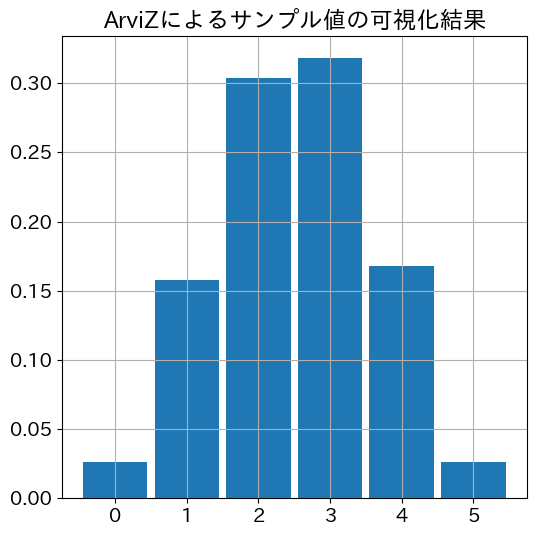

In [18]:
# ArviZ を用いて、事前サンプル x_samples の「経験分布」を可視化する。
# x_samples は
#
#   { x^{(s)} }_{s=1}^S
#
# という形のサンプル集合であり、理論的には
#
#   x^{(s)} ~ p(x)
#
# とみなせる（ここでは p(x) は事前予測分布、今回の設定では Binomial(5, 0.5)）。
# az.plot_dist は、このサンプルから推定される「分布の形」をプロットする関数で、
# 離散値が少ない場合はヒストグラム的な棒グラフ／ステップ状の密度として表示される。
ax = az.plot_dist(x_samples)

# タイトルを設定。
# 「ArviZ によるサンプル値の可視化結果」というタイトルは、
# この図が
#   - 理論分布そのもの（解析式）
# ではなく、
#   - 事前サンプル {x^{(s)}} に基づく経験分布の可視化
# であることを示すのに適している。
#
# ベイズ統計の観点から見ると、この図は
#   - 事前予測分布 p(x) の形が、サンプルレベルでどう見えるか
#   - サンプルサイズ S が十分であれば、理論値 Binomial(5, 0.5) にどの程度近づいているか
# を直感的に確認するためのものになる。
ax.set_title("ArviZによるサンプル値の可視化結果")